In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
df = pd.read_csv("sales_data_sample.csv", encoding='Latin-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [128]:
df.shape

(2823, 25)

In [129]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [130]:
X = df[['SALES','PRODUCTCODE']]

In [131]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS','POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER' , 'COUNTRY','PRODUCTLINE','DEALSIZE','ORDERDATE','PRODUCTCODE']
df = df.drop(df_drop, axis=1) 

In [132]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
0,30,95.70,2,2871.00,1,2,2003,95
1,34,81.35,5,2765.90,2,5,2003,95
2,41,94.74,2,3884.34,3,7,2003,95
3,45,83.26,6,3746.70,3,8,2003,95
4,49,100.00,14,5205.27,4,10,2003,95


In [133]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
MSRP               0
dtype: int64

In [134]:
df.describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [135]:
#checking the duplicated values 
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   QTR_ID           2823 non-null   int64  
 5   MONTH_ID         2823 non-null   int64  
 6   YEAR_ID          2823 non-null   int64  
 7   MSRP             2823 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 176.6 KB


### K Means implementation

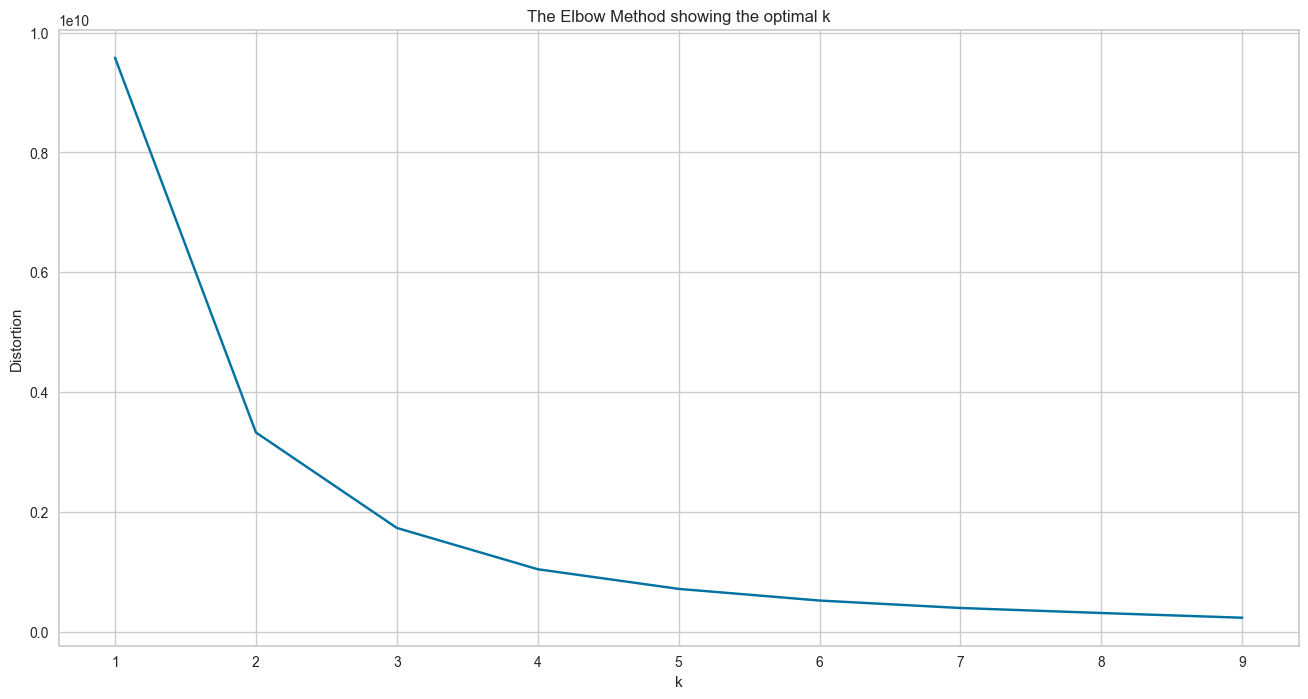

In [ ]:
from sklearn.cluster import KMeans 
 
WCSS = [] # Withhin Cluster Sum of Squares from the centroid 
 
distortions = []
K = range(1,10) 
for k in K: 
    kmeanModel = KMeans(n_clusters=k) 
    kmeanModel.fit(df) 
    distortions.append(kmeanModel.inertia_) 
 
plt.figure(figsize=(16,8)) 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method showing the optimal k') 
plt.show()

In [145]:
kmeanModel = KMeans(n_clusters=3) 
y_kmeans = kmeanModel.fit_predict 

In [146]:
print(y_kmeans)

<bound method _BaseKMeans.fit_predict of KMeans(n_clusters=3)>


<Axes: >

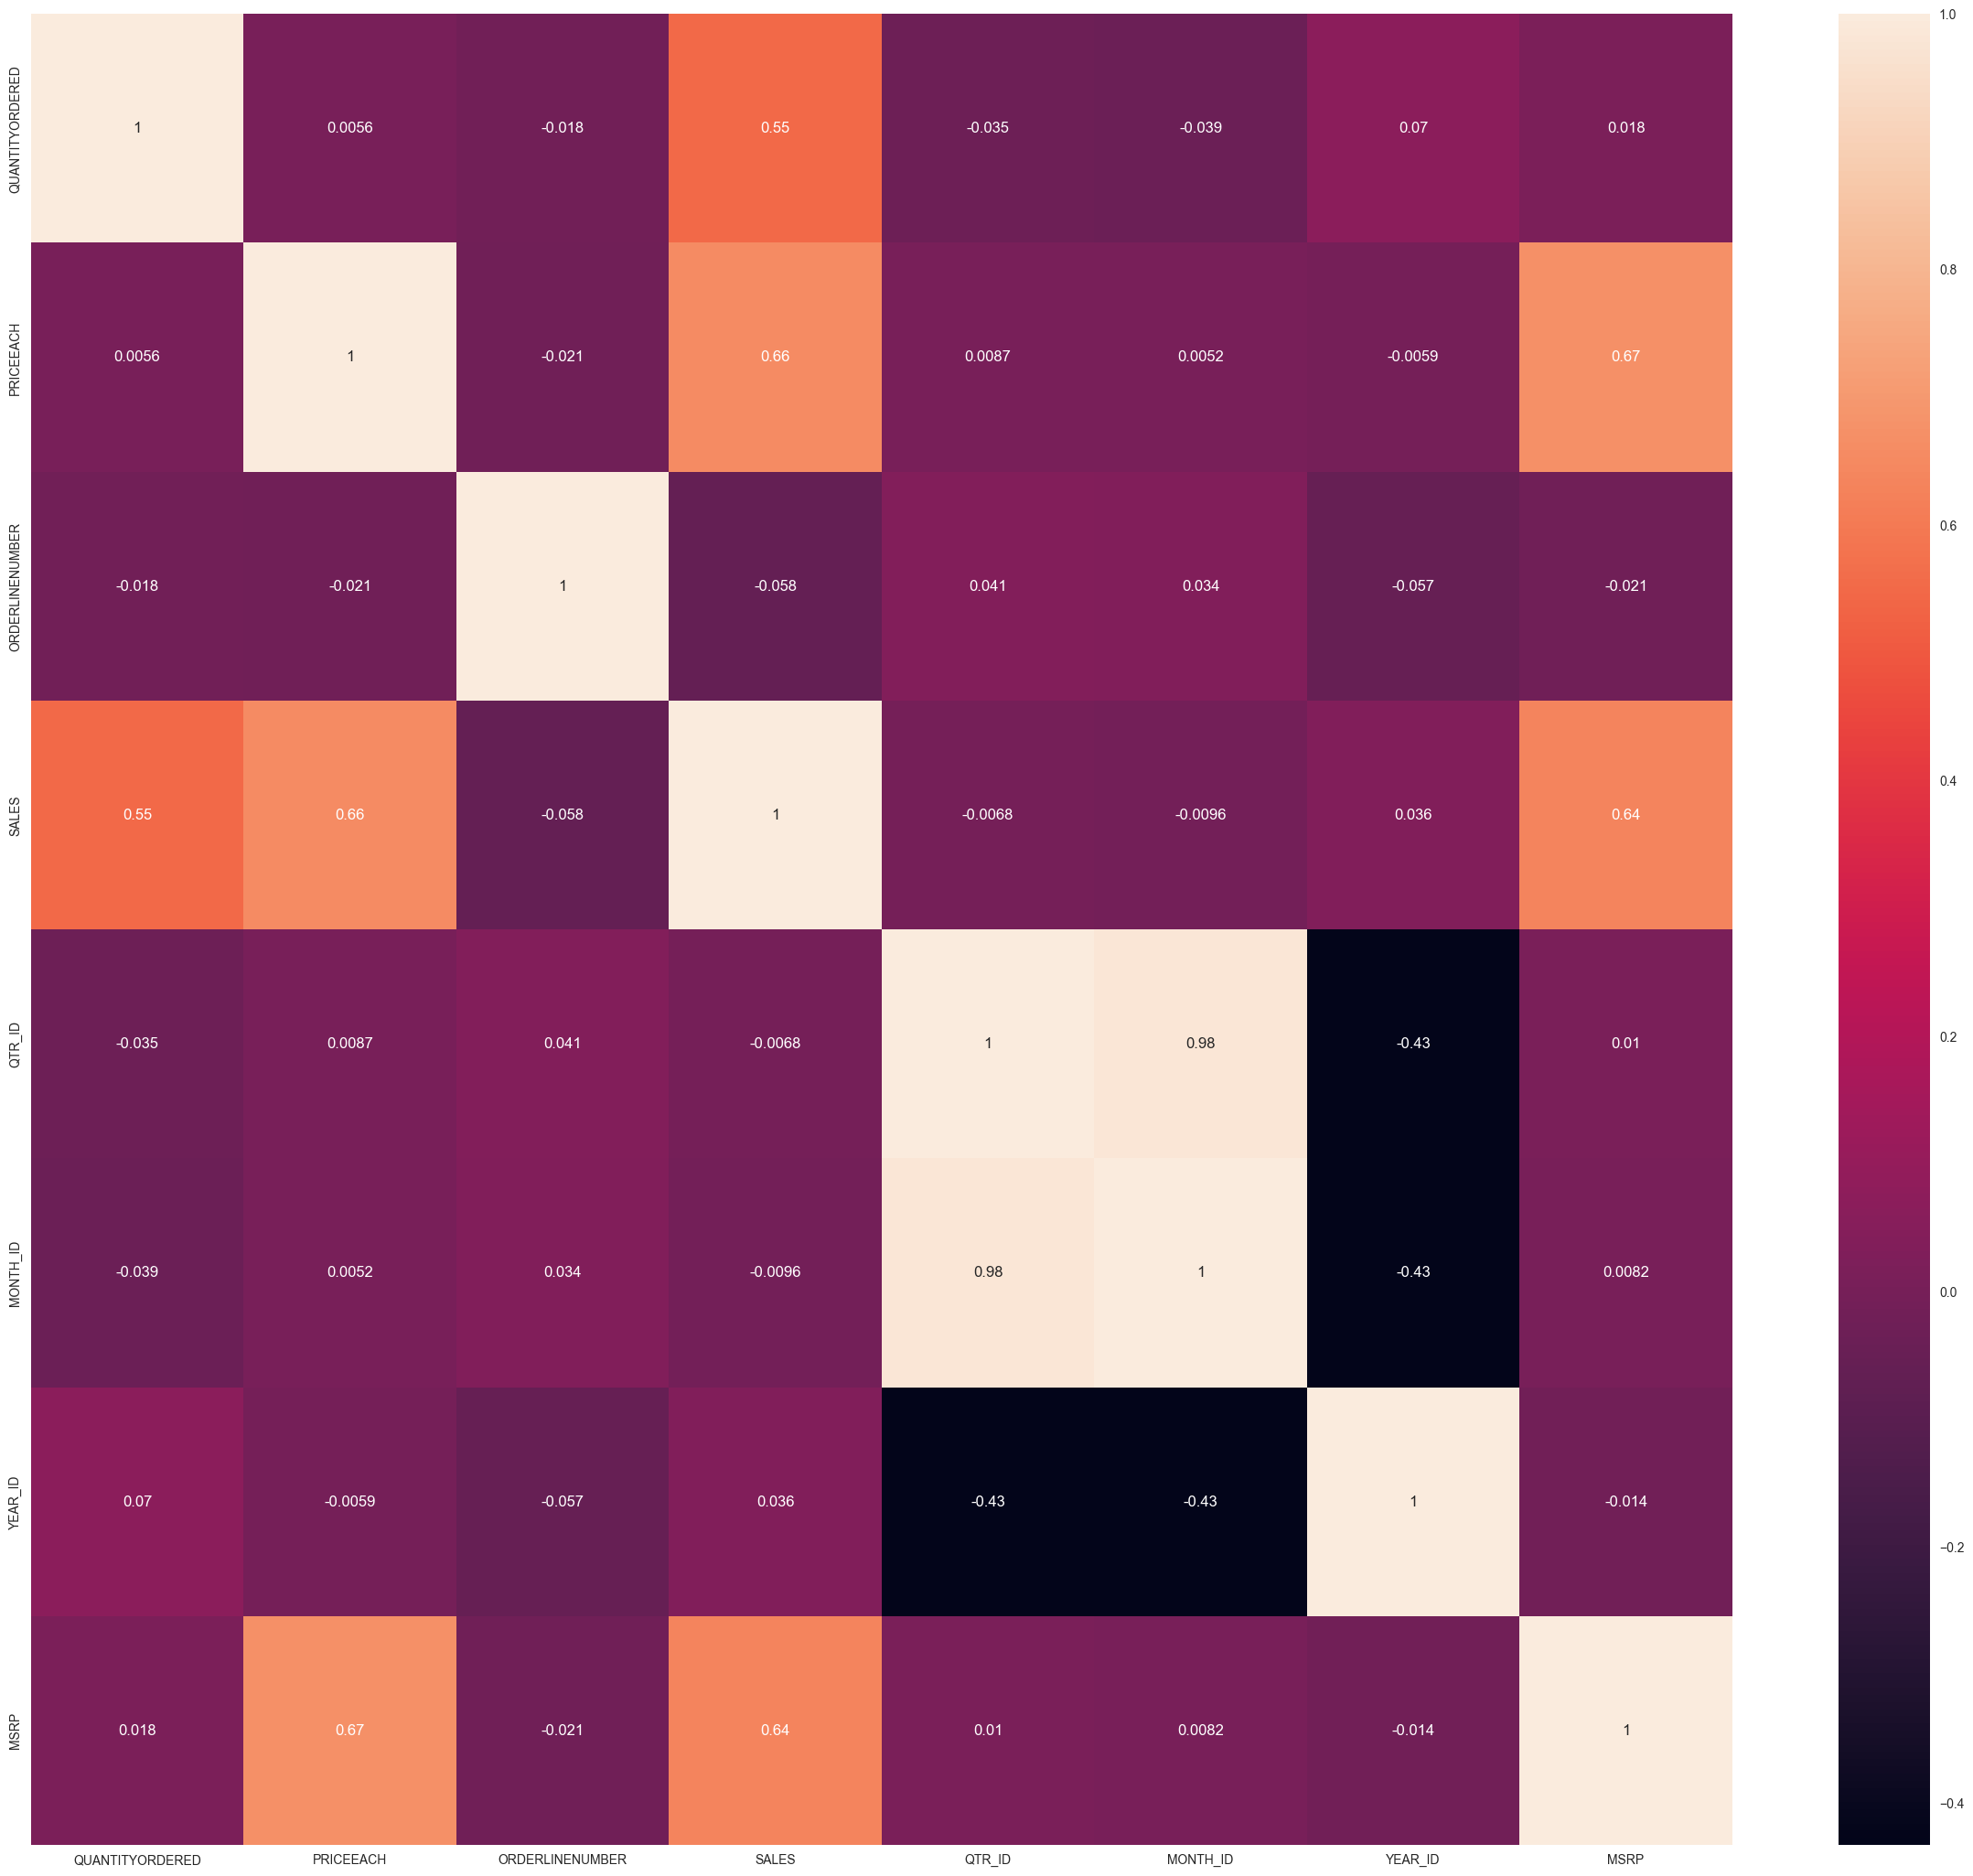

In [147]:
plt.figure(figsize = (30,26)) 
sns.heatmap(df.corr(),annot = True)